# Non-Linear Classification
 - In many real life problems, the data is not linearly separable,but we need to classify the data. This can be done using by projecting the data to higer dimesions so that it becomes linearly separable.

### Refer the Coding blocks jupyter naotebooks for more information

In [104]:
from sklearn.datasets import make_circles
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
#%matplotlib notebook

In [105]:
X, Y = make_circles(n_samples=500, noise=0.02)

In [106]:
print(X.shape, Y.shape)

(500, 2) (500,)


<IPython.core.display.Javascript object>


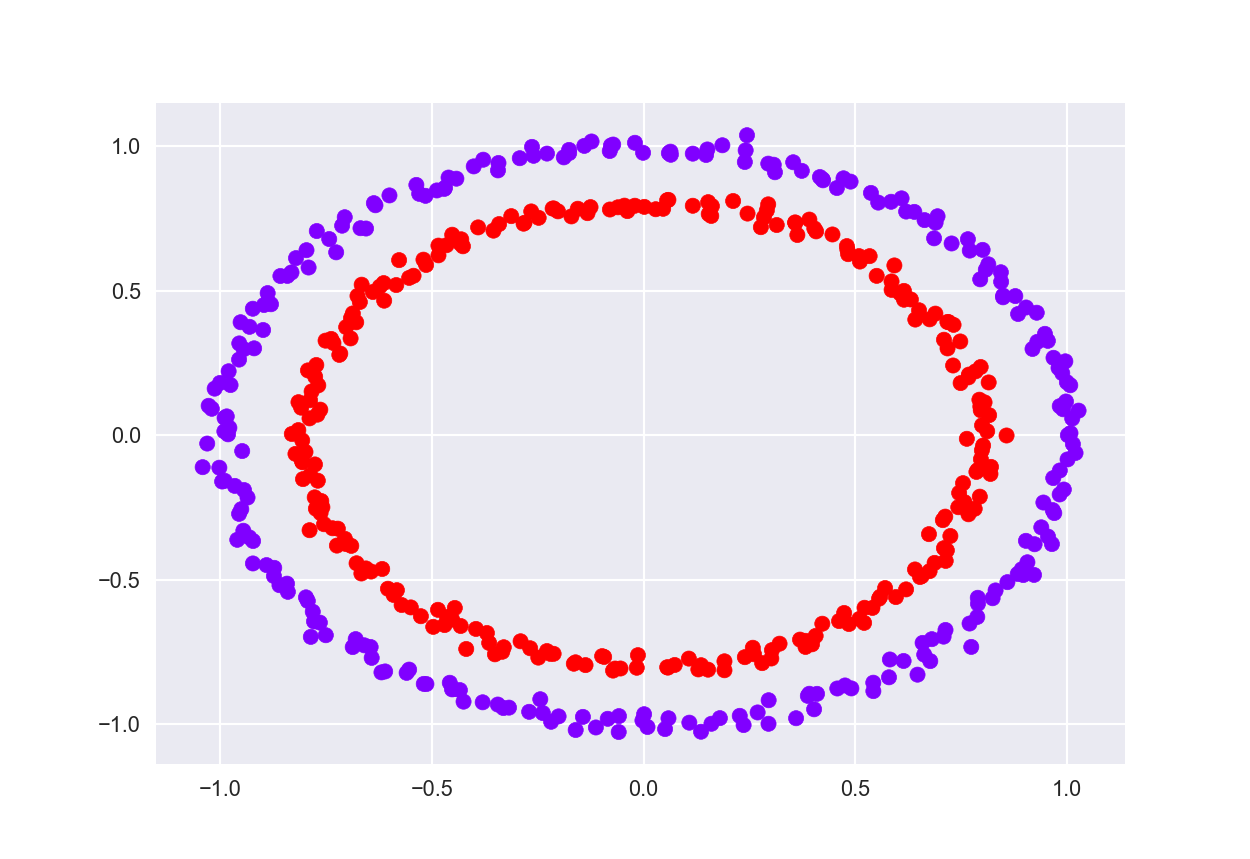

In [107]:
plt.style.use('seaborn')
plt.scatter(X[:,0], X[:,1], c=Y, cmap='rainbow')
plt.show()

In [108]:
def phi(X):
    """Non Linear Transformation"""
    x1 = X[:,0]
    x2 = X[:,1]
    x3 = x1**2 + x2**2
    
    X_ = np.zeros((X.shape[0], 3))
    print(X_.shape)
    X_[:, :-1] = X
    X_[:, -1] = x3
    
    return X_
    

In [109]:
X_ = phi(X)

(500, 3)


In [110]:
print(X[:3,  :])

[[ 0.13551948 -1.02671063]
 [-0.83966681 -0.54248629]
 [ 0.05852826  0.81430379]]


In [111]:
print(X_[:3, :])

[[ 0.13551948 -1.02671063  1.07250025]
 [-0.83966681 -0.54248629  0.99933173]
 [ 0.05852826  0.81430379  0.66651621]]


In [112]:
def plot3d(X, show=True):
    fig = plt.figure(figsize=(7, 5))
    ax = fig.gca(projection='3d')
    
    X1 = X[:,0]
    X2 = X[:,1]
    X3 = X[:,2]
                    
    ax.scatter(X1,X2,X3, c=Y, depthshade=True, cmap='rainbow')
    
    if show==True:
        plt.show()
    else:
        return ax

<IPython.core.display.Javascript object>


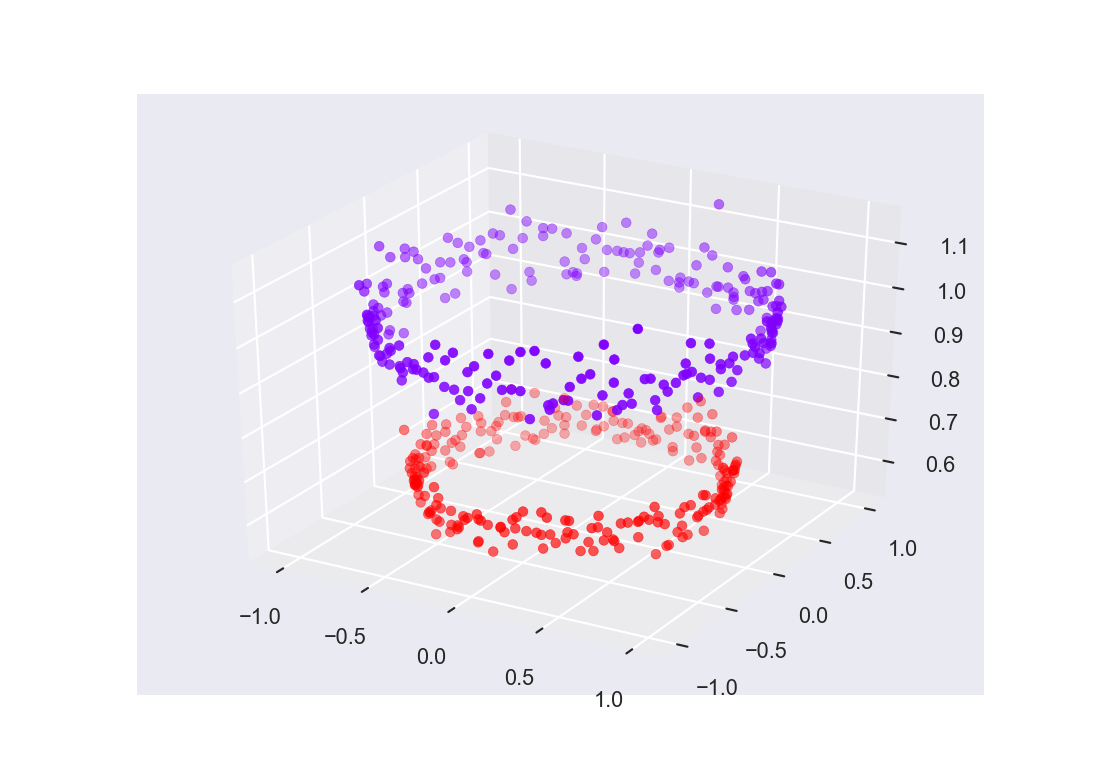

In [113]:
plot3d(X_)

### Logistics Classifier

In [114]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

In [115]:
lr = LogisticRegression()

In [116]:
acc = cross_val_score(lr,X,Y,cv=5).mean()
print("Accuracy is {:.4f}".format(acc*100))

Accuracy is 43.6000


### Logistic Classifier on Higher Dimension Space

In [117]:
lr.fit(X_, Y)

LogisticRegression()

In [118]:
wts = lr.coef_
print(wts)

[[  0.02483182  -0.02589037 -10.90530205]]


In [119]:
bias = lr.intercept_

In [120]:
xx, yy = np.meshgrid(range(-2, 2), range(-2, 2))
print(xx)
print(yy)

[[-2 -1  0  1]
 [-2 -1  0  1]
 [-2 -1  0  1]
 [-2 -1  0  1]]
[[-2 -2 -2 -2]
 [-1 -1 -1 -1]
 [ 0  0  0  0]
 [ 1  1  1  1]]


In [121]:
z = -(wts[0,0]*xx + wts[0,1]*yy + bias)/wts[0,2] 
print(z)

[[0.82050393 0.82278098 0.82505802 0.82733506]
 [0.81812983 0.82040687 0.82268391 0.82496095]
 [0.81575572 0.81803276 0.8203098  0.82258684]
 [0.81338161 0.81565865 0.81793569 0.82021273]]


<IPython.core.display.Javascript object>


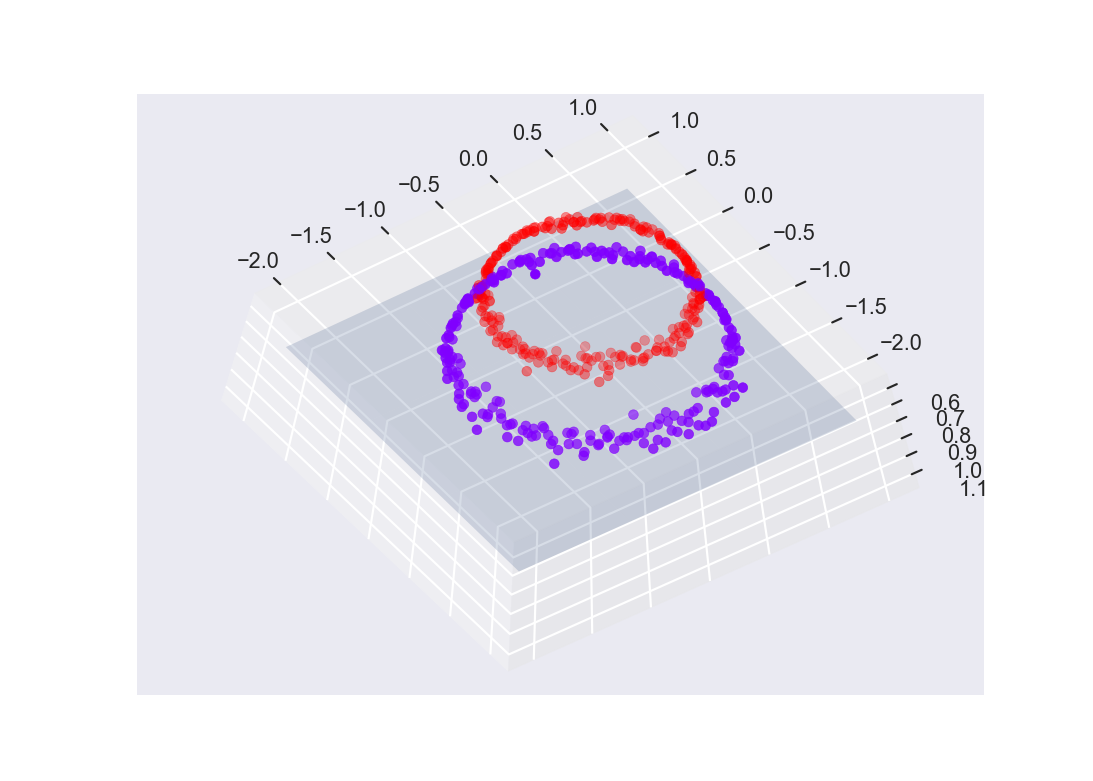

In [122]:
ax = plot3d(X_, False)
ax.plot_surface(xx, yy, z, alpha=0.2)
plt.show()

# Kernel Based Classifcation in SVM's
Sklearn supports the following types of Kernels, which can be used in many-real life problems.

 - Linear Kernel
 - RBF Kernel
 - Polynomial Kernel
 - Sigmoid Kernel

**Kernel trick** is method of using a linear classifer to solve a non-linear problem. It transforms the linearly in-separable data into linearly separable one.

In [123]:
from sklearn import svm 

### Linear Kernel SVM

In [124]:
svc = svm.SVC(kernel='linear')

In [125]:
svc.fit(X, Y)

SVC(kernel='linear')

In [126]:
svc.score(X, Y)

0.504

### RBF Kernel SVM

In [127]:
svc = svm.SVC(kernel='rbf')
svc.fit(X, Y)
svc.score(X, Y)

1.0

### Polinomial

In [128]:
svc = svm.SVC(kernel="poly")
svc.fit(X, Y)
svc.score(X, Y)

0.554

### Custom kernel

In [130]:
def custom_kernel(x1, x2):
    return np.square(np.dot(x1, x2.T))

svc = svm.SVC(kernel=custom_kernel)
svc.fit(X, Y)
svc.score(X,Y)

1.0

#### We can also try sigmoid kernel 